In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [3]:
class Net(nn.Module):
    def __init__(self):
        # __init__ 함수에서는 신경망에 쓰일 각각의 layer들을 초기화 
        super(Net, self).__init__() 
    
        self.conv1 = nn.Conv2d(1, 6, 3)
        self.conv2 = nn.Conv2d(6, 16, 3)
        self.fc1 = nn.Linear(16 * 6 * 6, 120) # 6x6 이미지 차원, 120 output
        self.fc2 = nn.Linear(120, 84) 
        self.fc3 = nn.Linear(84, 10) # 최종 output은 10으로 줄어듦

    def forward(self, x):
        # 앞서 정의해둔 layer들을 어떤 식으로 사용할지 forward에서 결정
        # 입력으로 들어온 x가 conv1을 통과후 relu를 거친후 맥스풀링 
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, self.num_flat_features(x)) # flat하게 펼쳐준다
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
    def num_falt_features(self, x):
        size = x.size()[1:]
        num_features = 1
        for s in size:
            num_features *= s 
        
        return num_features


In [4]:

net = Net()
print(net)

Net(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=576, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


선형회귀 (Regression Model 생성)

In [5]:
import torch
import torch.nn as nn
import torch.optim as optim

import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

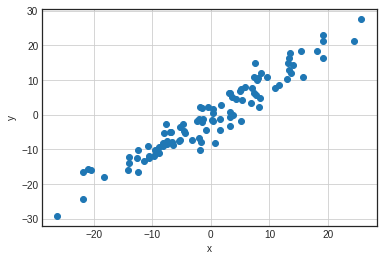

In [31]:
X = torch.randn(100, 1)*10
y = X + 3 * torch.randn(100, 1)
plt.plot(X.numpy(), y.numpy(), 'o')
plt.ylabel('y')
plt.xlabel('x')
plt.grid()
plt.show()

In [32]:
# 신경망 이름을 설정해준뒤 nn.Module을 상속받는다. 
class LinearRegressionModel(nn.Module):
  # 신경망에서 사용할 layer를 정의 
  def __init__(self):
    super(LinearRegressionModel, self).__init__()
    self.linear = nn.Linear(1, 1) # 단순히 1x1입력을 받는 선형 layer

  def forward(self, x):
    pred = self.linear(x) # 입력값을 받은후 선형 layer를 통과 시켜준 값을 반환
    return pred

  # 단순 하나의 layer만 존재하는 신경망 

In [33]:
torch.manual_seed(111)

model = LinearRegressionModel()
print(model)

LinearRegressionModel(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)


In [19]:
print(list(model.parameters()))

[Parameter containing:
tensor([[0.4311]], requires_grad=True), Parameter containing:
tensor([0.8280], requires_grad=True)]


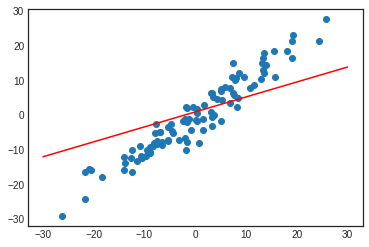

In [34]:
w, b = model.parameters()
def get_params():
  return w[0][0].item(), b[0].item()

def plot_fit(title):
  plt.title = title
  w1, b1 = get_params()
  x1 = np.array([-30, 30])
  y1 = w1 * x1 + b1
  plt.plot(x1, y1, 'r')
  plt.scatter(X, y)
  plt.show()

plot_fit('Initial Model')

## 손실함수와 옵티마이저

In [35]:
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)

## 모델 학습

In [36]:
epochs = 100 # 100번 반복
losses = [] 
for epoch in range(epochs):
  optimizer.zero_grad() # 매개변수 0으로 초기화  

  y_pred = model(X) # 모델의 예측값 
  loss = criterion(y_pred, y) # MSE loss 사용
  losses.append(loss) # 리스트에 loss값들을 추가
  loss.backward() # 역전파

  optimizer.step() # lr을 반영

  if epoch % 10 ==0:
    print(f"Epoch: {epoch+1}\t {loss:.4f}")

  

Epoch: 1	 47.0144
Epoch: 11	 11.3691
Epoch: 21	 11.1018
Epoch: 31	 11.0481
Epoch: 41	 10.9977
Epoch: 51	 10.9493
Epoch: 61	 10.9028
Epoch: 71	 10.8581
Epoch: 81	 10.8151
Epoch: 91	 10.7739


## 시각화

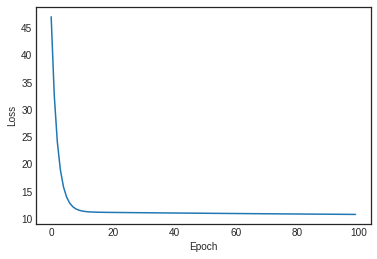

In [40]:
plt.plot(range(epochs), torch.Tensor(losses))
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

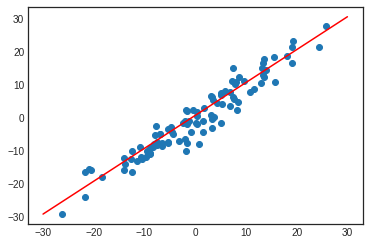

In [39]:
plot_fit("Trained Model")